<a href="https://colab.research.google.com/github/uli-231/ONE_Challenge_Telecom_X/blob/main/Challenge_Telecom_X_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ONE_Challenge_Telecom_X**

##**Extracción de datos**

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

🔗GitHub -
https://github.com/ingridcristh/challenge2-data-science-LATAM

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

#### **Código**

In [2]:
import requests
import pandas as pd

In [10]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##**Transformación de los datos**

###**Conoce el conjunto de datos**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#### **Código**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [14]:
# Flatten nested JSON columns
nested_cols = ['customer', 'phone', 'internet', 'account']

for col in nested_cols:
    nested_df = pd.json_normalize(df[col])
    df = pd.concat([df.drop(columns=[col]), nested_df], axis=1)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
display(df.iloc[1775])

,1775
customerID,2520-SGTTA
Churn,No
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,Yes
MultipleLines,No
InternetService,No


###**Comprobación de incoherencias en los datos**

En este paso, **verifica si hay problemas en los datos** que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

#### **Código**

In [16]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values per column:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Number of duplicate rows:
0


###**Manejo de inconsistencias**

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

#### **Código**

In [18]:
# Check for non-numeric values in 'Charges.Total'
non_numeric_total_charges = df[pd.to_numeric(df['Charges.Total'], errors='coerce').isna()]

print("Rows with non-numeric 'Charges.Total' values:")
display(non_numeric_total_charges)

# Convert 'Charges.Total' to numeric, coercing errors
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Check for NaN values after conversion
print("\nMissing values after converting 'Charges.Total':")
print(df['Charges.Total'].isnull().sum())

Rows with non-numeric 'Charges.Total' values:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,



Missing values after converting 'Charges.Total':
11


In [19]:
df.dropna(subset=['Charges.Total'], inplace=True)
print("Missing values after dropping rows:")
print(df.isnull().sum())
display(df.head())

Missing values after dropping rows:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [20]:
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')

print("Data types after converting 'SeniorCitizen' and 'Charges.Monthly':")
print(df[['SeniorCitizen', 'Charges.Monthly']].dtypes)

Data types after converting 'SeniorCitizen' and 'Charges.Monthly':
SeniorCitizen        int64
Charges.Monthly    float64
dtype: object


In [21]:
print("Missing values after converting 'SeniorCitizen' and 'Charges.Monthly':")
print(df[['SeniorCitizen', 'Charges.Monthly']].isnull().sum())

Missing values after converting 'SeniorCitizen' and 'Charges.Monthly':
SeniorCitizen      0
Charges.Monthly    0
dtype: int64


###**Columna de cuentas diarias**

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

#### **Código**

In [22]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
display(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [30]:
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [31]:
display(df['Contract'])

,Contract
0,One year
1,Month-to-month
2,Month-to-month
3,Month-to-month
4,Month-to-month
...,...
7262,One year
7263,Month-to-month
7264,Month-to-month
7265,Two year


###**Estandarización y transformación de datos (opcional)**

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

#### **Código**

In [24]:
# Identify categorical columns (object type, excluding 'customerID')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
# 'Churn' is the target variable, we will encode it separately later
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


print("Categorical columns to encode:")
print(categorical_cols)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

Categorical columns to encode:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


,customerID,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,0,9,65.6,593.30,2.186667,False,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0003-MKNFE,No,0,9,59.9,542.40,1.996667,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,Yes,0,4,73.9,280.85,2.463333,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,Yes,1,13,98.0,1237.85,3.266667,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,Yes,1,3,83.9,267.40,2.796667,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [25]:
# Identify boolean columns
boolean_cols = df_encoded.select_dtypes(include='bool').columns

# Convert boolean columns to integer (0s and 1s)
df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)

display(df_encoded.head())

,customerID,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,0,9,65.6,593.30,2.186667,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,No,0,9,59.9,542.40,1.996667,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Yes,0,4,73.9,280.85,2.463333,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,Yes,1,13,98.0,1237.85,3.266667,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,Yes,1,3,83.9,267.40,2.796667,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [26]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
display(df_encoded[['Churn']].head())

,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [28]:
# Create a dictionary with old and new column names
rename_map = {
    'customerID': 'ID_Cliente',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad_Meses',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Varias_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario',
    'Churn': 'Cliente_Perdido'
}

# Rename columns in the DataFrame
df_encoded.rename(columns=rename_map, inplace=True)

# Display the first few rows with the new column names
display(df_encoded.head())

,ID_Cliente,Cliente_Perdido,Ciudadano_Mayor,Antiguedad_Meses,Cargo_Mensual,Cargo_Total,Cargo_Diario,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0.0,0,9,65.6,593.30,2.186667,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0.0,0,9,59.9,542.40,1.996667,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1.0,0,4,73.9,280.85,2.463333,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1.0,1,13,98.0,1237.85,3.266667,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1.0,1,3,83.9,267.40,2.796667,0,1,0,...,0,1,0,0,0,0,1,0,0,1


##**Carga y análisis de los Datos**

###**Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

#### **Código**

In [27]:
df_encoded.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,...,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,32.395535,64.755423,2280.634213,2.158514,0.505650,0.483600,0.299063,0.902839,...,0.217062,0.383958,0.217062,0.387955,0.209206,0.238837,0.593716,0.215959,0.336963,0.228363
std,0.441782,0.3693,24.558067,30.125739,2268.632997,1.004191,0.500003,0.499765,0.457879,0.296197,...,0.412273,0.486381,0.412273,0.487318,0.406770,0.426402,0.491173,0.411514,0.472705,0.419806
min,0.000000,0.0000,1.000000,18.250000,18.800000,0.608333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0000,9.000000,35.450000,400.225000,1.181667,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0000,29.000000,70.300000,1391.000000,2.343333,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0000,55.000000,89.900000,3785.300000,2.996667,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.0000,72.000000,118.750000,8684.800000,3.958333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###**Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

#### **Código**

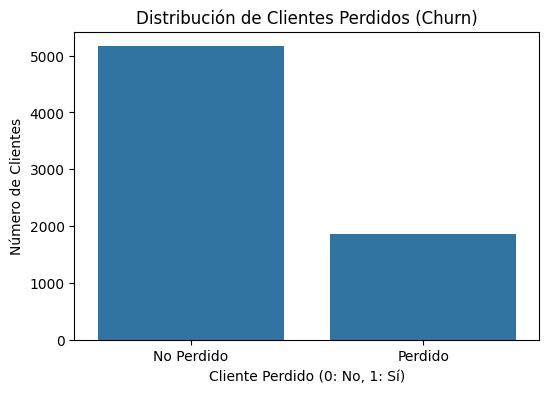

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Cliente_Perdido', data=df_encoded)
plt.title('Distribución de Clientes Perdidos (Churn)')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

###**Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

#### **Código**

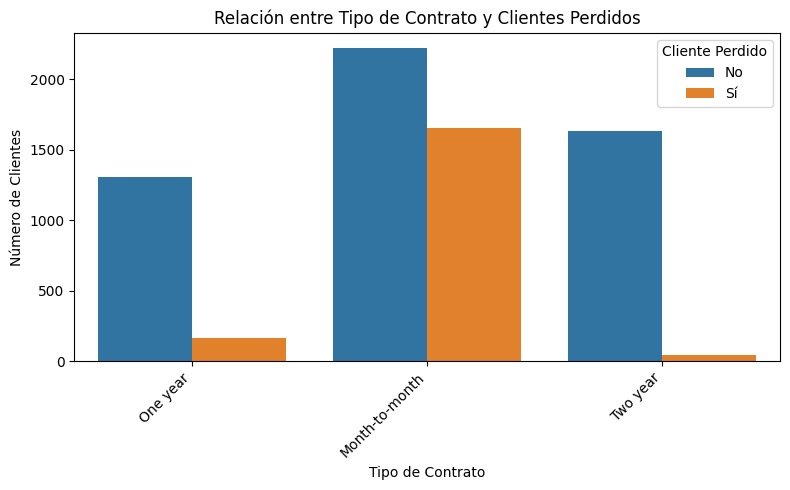

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map 'Churn' in the original df to numerical for plotting
df['Cliente_Perdido'] = df['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Cliente_Perdido', data=df)
plt.title('Relación entre Tipo de Contrato y Clientes Perdidos')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

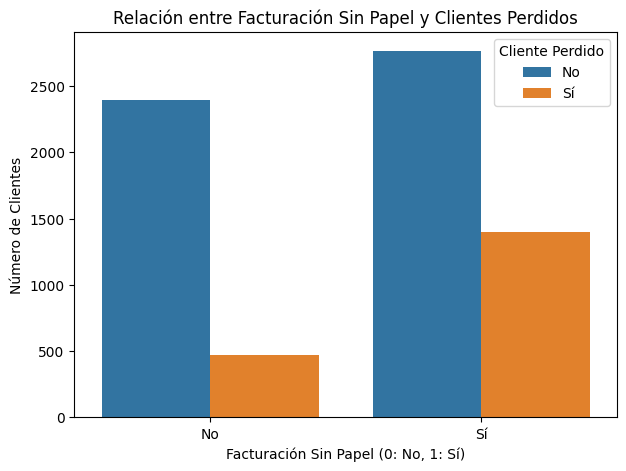

In [35]:
plt.figure(figsize=(7, 5))
sns.countplot(x='PaperlessBilling_Yes', hue='Cliente_Perdido', data=df_encoded)
plt.title('Relación entre Facturación Sin Papel y Clientes Perdidos')
plt.xlabel('Facturación Sin Papel (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.show()

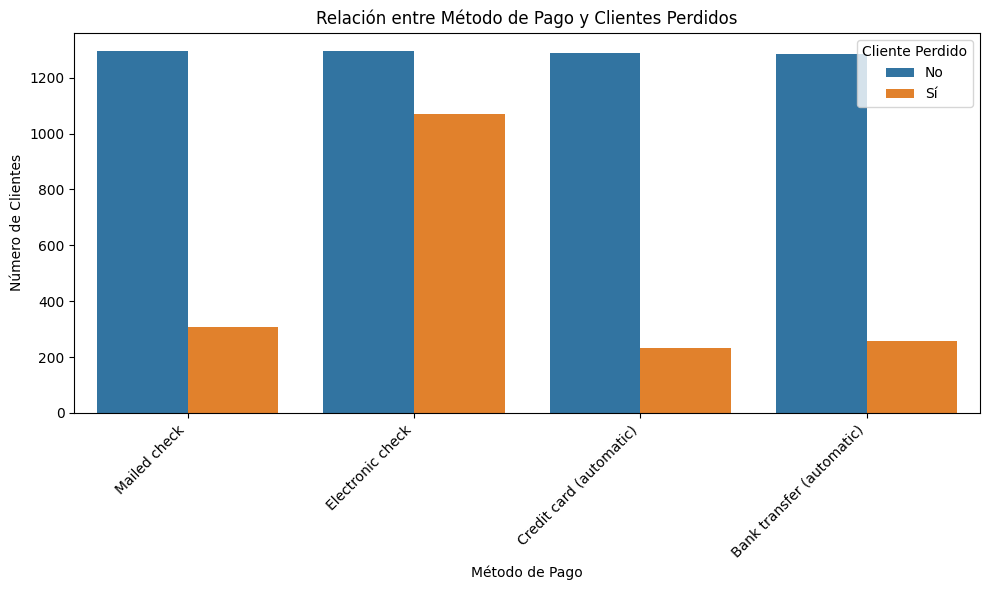

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Cliente_Perdido', data=df)
plt.title('Relación entre Método de Pago y Clientes Perdidos')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

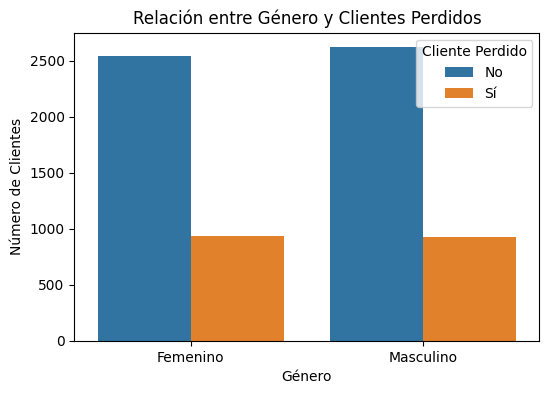

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender_Male', hue='Cliente_Perdido', data=df_encoded)
plt.title('Relación entre Género y Clientes Perdidos')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.show()

###**Conteo de evasión por variables numéricas**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

#### **Código**

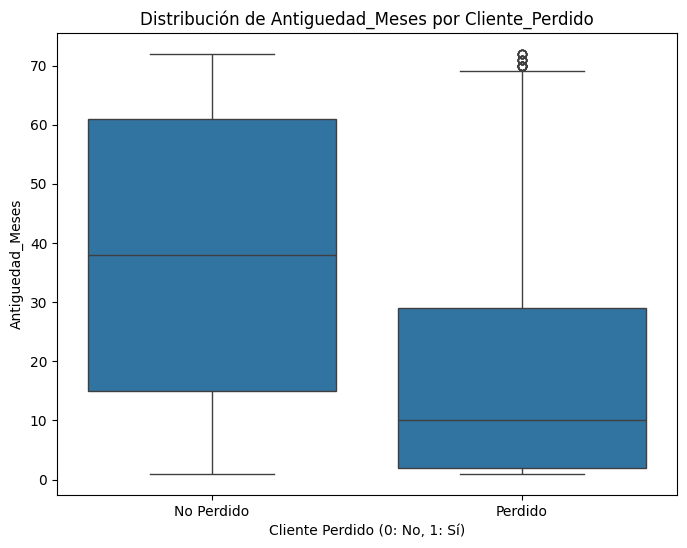

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Antiguedad_Meses', data=df_encoded)
plt.title('Distribución de Antiguedad_Meses por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Antiguedad_Meses')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

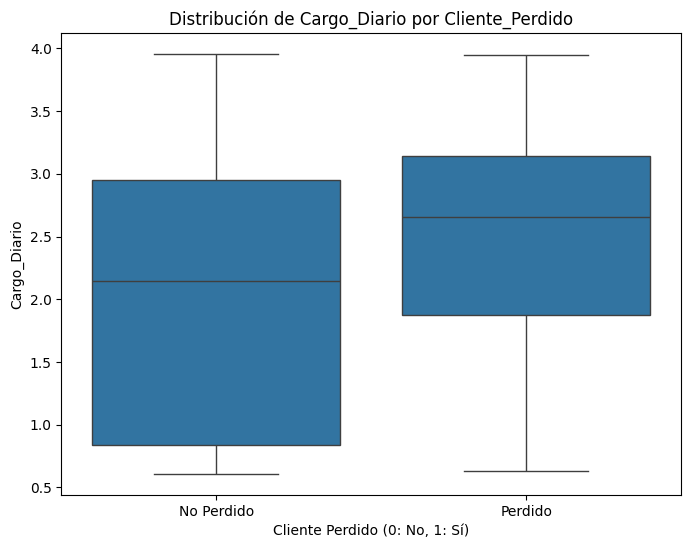

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Cargo_Diario', data=df_encoded)
plt.title('Distribución de Cargo_Diario por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Cargo_Diario')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

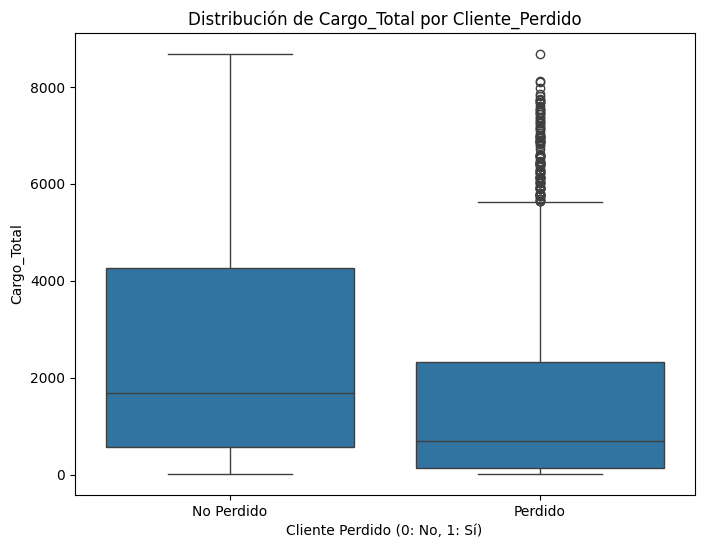

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Cargo_Total', data=df_encoded)
plt.title('Distribución de Cargo_Total por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Cargo_Total')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

##**Informe final**

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

## Informe Final: Análisis de Evasión de Clientes (Churn) en Telecom X

### Introducción

Este informe presenta un análisis exploratorio de los datos de clientes de Telecom X con el objetivo de comprender los factores que contribuyen a la evasión de clientes (churn). La evasión de clientes es un desafío crítico para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y el crecimiento. Identificar los patrones y las razones detrás de la evasión es fundamental para desarrollar estrategias efectivas de retención de clientes.

El análisis se basa en los datos proporcionados por la API de Telecom X, que incluye información demográfica de los clientes, servicios contratados y estado de evasión.

### Limpieza y Tratamiento de Datos

La fase de limpieza y tratamiento de datos fue crucial para preparar el conjunto de datos para el análisis. Los pasos realizados incluyeron:

1.  **Carga de Datos:** Los datos fueron cargados directamente desde la API de Telecom X en formato JSON utilizando la librería `requests` y convertidos a un DataFrame de pandas.
2.  **Aplanamiento de Datos Anidados:** Las columnas con estructuras JSON anidadas ('customer', 'phone', 'internet', 'account') fueron aplanadas para integrar la información en el DataFrame principal, facilitando el acceso a las variables individuales.
3.  **Verificación de Inconsistencias:** Se verificaron valores ausentes y duplicados. Inicialmente, no se encontraron valores ausentes o duplicados en la mayoría de las columnas.
4.  **Manejo de Tipos de Datos:** Se identificó que las columnas 'Charges.Total', 'SeniorCitizen' y 'Charges.Monthly' estaban como tipo 'object' a pesar de contener valores numéricos. Se convirtieron a tipos numéricos utilizando `pd.to_numeric`. Durante la conversión de 'Charges.Total', se identificaron 11 filas con valores no numéricos, las cuales fueron eliminadas del conjunto de datos.
5.  **Creación de Nueva Columna:** Se creó la columna 'Cuentas_Diarias' calculando el cargo diario a partir del 'Charges.Monthly' (dividiendo por 30).
6.  **Estandarización y Transformación:** Las columnas categóricas fueron identificadas y se aplicó one-hot encoding para convertirlas a un formato numérico (0s y 1s), adecuado para análisis posteriores y modelado. La columna objetivo 'Churn' también fue codificada a 0 (No Perdido) y 1 (Perdido).
7.  **Renombrado de Columnas:** Se renombraron varias columnas a nombres en español más descriptivos para mejorar la comprensibilidad del conjunto de datos.

### Análisis Exploratorio de Datos

El análisis exploratorio de datos (EDA) se centró en comprender la distribución de la variable objetivo 'Cliente_Perdido' y su relación con otras características del cliente.

*   **Distribución de Evasión:** Se visualizó la proporción de clientes perdidos y no perdidos, revelando un desequilibrio en el conjunto de datos, con un número significativamente mayor de clientes que no han evadido.

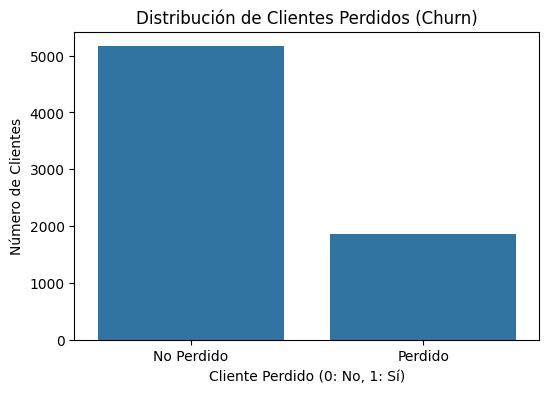

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Cliente_Perdido', data=df_encoded)
plt.title('Distribución de Clientes Perdidos (Churn)')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

*   **Evasión por Tipo de Contrato:** El análisis mostró que los clientes con contratos mes a mes tienen una tasa de evasión considerablemente más alta en comparación con aquellos con contratos de uno o dos años.

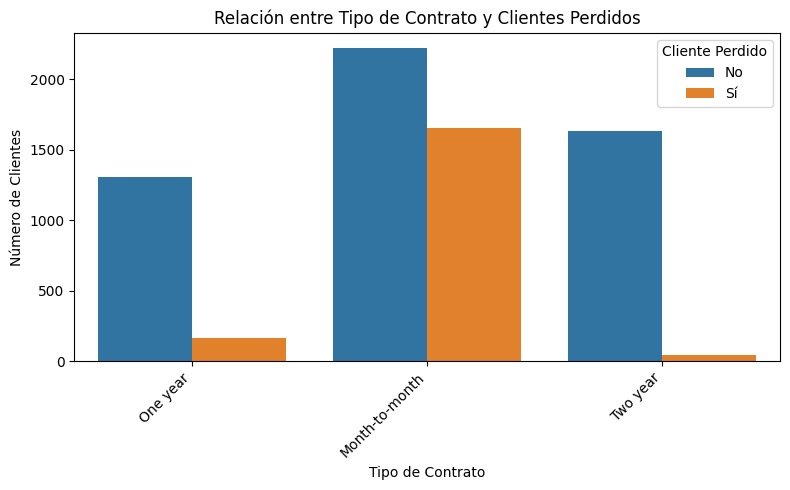

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Cliente_Perdido', data=df)
plt.title('Relación entre Tipo de Contrato y Clientes Perdidos')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

*   **Evasión por Antigüedad:** La visualización de la antigüedad (tenure) por estado de evasión indicó que los clientes que evaden tienden a tener una antigüedad menor en la empresa.

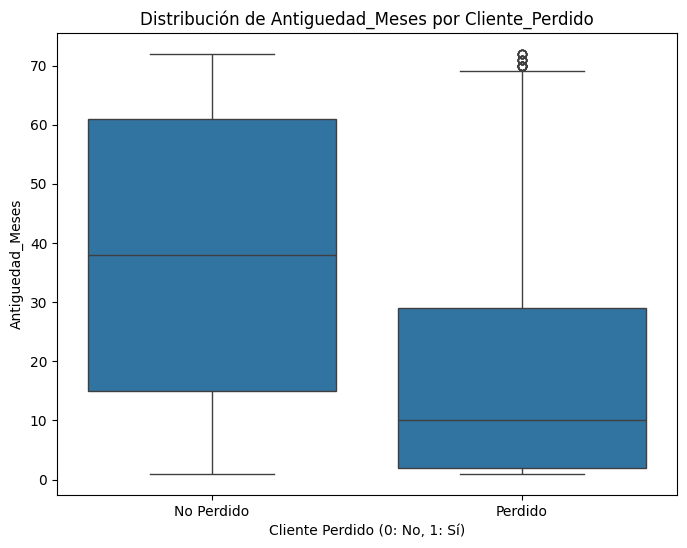

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Antiguedad_Meses', data=df_encoded)
plt.title('Distribución de Antiguedad_Meses por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Antiguedad_Meses')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

*   **Evasión por Facturación Sin Papel:** Se observó que los clientes que optan por la facturación sin papel presentan un número mayor de casos de evasión.

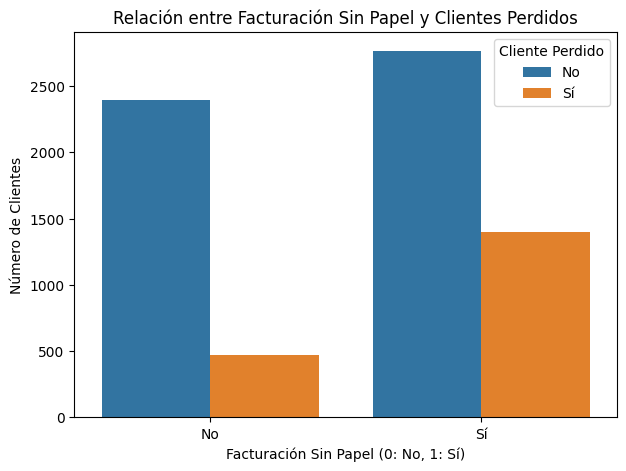

In [44]:
plt.figure(figsize=(7, 5))
sns.countplot(x='PaperlessBilling_Yes', hue='Cliente_Perdido', data=df_encoded)
plt.title('Relación entre Facturación Sin Papel y Clientes Perdidos')
plt.xlabel('Facturación Sin Papel (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.show()

*   **Evasión por Método de Pago:** El análisis por método de pago reveló que los clientes que utilizan el pago electrónico tienen una tasa de evasión notablemente más alta.

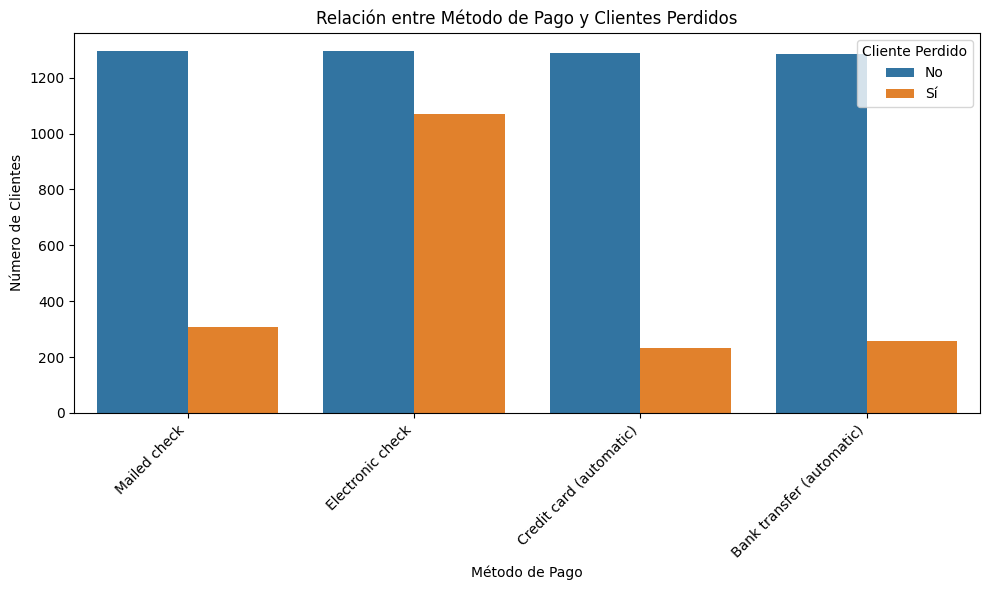

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Cliente_Perdido', data=df)
plt.title('Relación entre Método de Pago y Clientes Perdidos')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

*   **Evasión por Cargo Diario y Total:** Los box plots para el cargo diario y el cargo total sugieren que los clientes que evaden tienden a tener cargos mensuales y totales ligeramente más altos en comparación con los que no evaden (aunque la relación con el cargo total puede estar influenciada por la menor antigüedad).

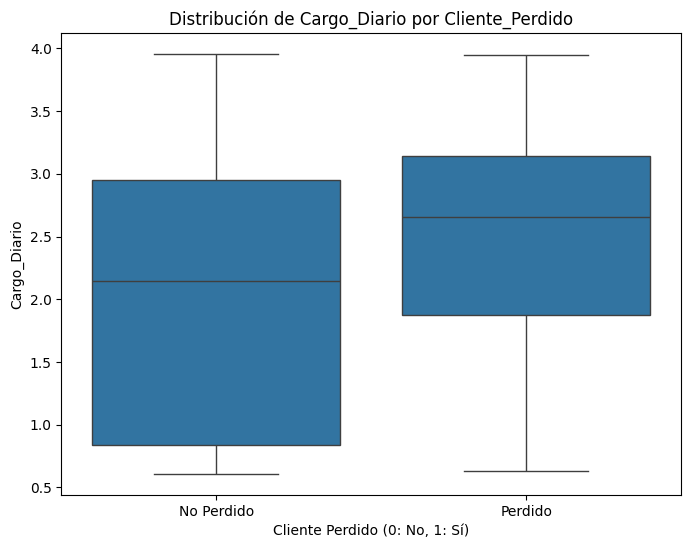

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Cargo_Diario', data=df_encoded)
plt.title('Distribución de Cargo_Diario por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Cargo_Diario')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

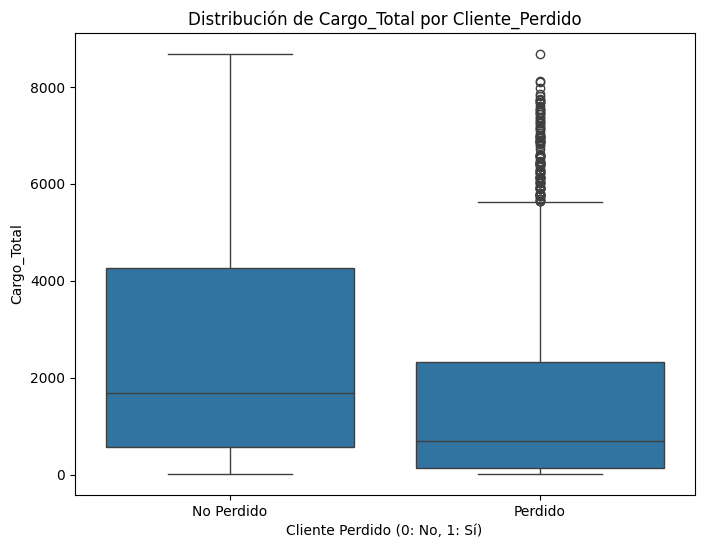

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente_Perdido', y='Cargo_Total', data=df_encoded)
plt.title('Distribución de Cargo_Total por Cliente_Perdido')
plt.xlabel('Cliente Perdido (0: No, 1: Sí)')
plt.ylabel('Cargo_Total')
plt.xticks([0, 1], ['No Perdido', 'Perdido'])
plt.show()

*   **Evasión por Género:** El análisis por género no mostró una diferencia significativa en la tasa de evasión entre hombres y mujeres.

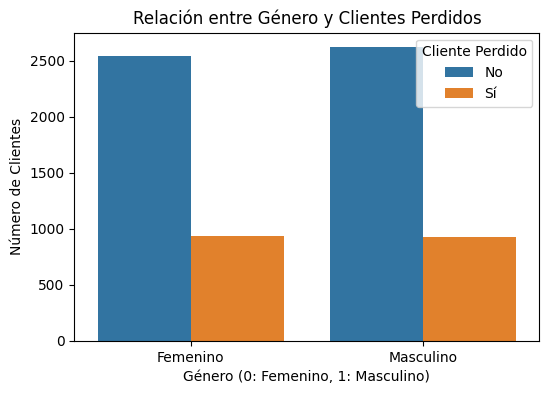

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender_Male', hue='Cliente_Perdido', data=df_encoded)
plt.title('Relación entre Género y Clientes Perdidos')
plt.xlabel('Género (0: Femenino, 1: Masculino)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.legend(title='Cliente Perdido', labels=['No', 'Sí'])
plt.show()

### Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer las siguientes conclusiones clave sobre la evasión de clientes en Telecom X:

*   **Contratos a Corto Plazo:** Los clientes con contratos mes a mes tienen una probabilidad significativamente mayor de evadir. Esto sugiere que la falta de compromiso a largo plazo es un factor de riesgo importante.
*   **Antigüedad:** Los clientes con menor antigüedad son más propensos a evadir. Los clientes leales con mayor tiempo en la empresa tienden a permanecer.
*   **Facturación Sin Papel y Pago Electrónico:** Curiosamente, los clientes que utilizan facturación sin papel y pago electrónico muestran tasas de evasión más altas. Esto podría estar relacionado con un perfil de cliente más digitalmente activo o con la conveniencia de cambiar de proveedor. Se requeriría una investigación adicional para comprender completamente esta relación.
*   **Cargos:** Los clientes que evaden tienden a tener cargos mensuales y totales (aunque este último puede estar influenciado por la antigüedad) ligeramente más altos. Esto podría indicar insatisfacción con el costo del servicio en relación con el valor percibido.
*   **Género:** El género no parece ser un predictor significativo de la evasión en este conjunto de datos.

Estos hallazgos sugieren que la duración del contrato, la antigüedad del cliente, los métodos de facturación y pago, y los cargos son variables importantes a considerar en un modelo de predicción de evasión.

### Recomendaciones

Con base en los insights obtenidos del análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Incentivar Contratos a Largo Plazo:** Implementar programas de incentivos o descuentos para alentar a los clientes con contratos mes a mes a cambiar a planes de uno o dos años.
*   **Programas de Lealtad:** Desarrollar programas de lealtad o recompensas para clientes con mayor antigüedad para fortalecer su compromiso con la empresa.
*   **Investigar Métodos de Pago y Facturación Digital:** Realizar un análisis más profundo para entender por qué los clientes que utilizan facturación sin papel y pago electrónico tienen tasas de evasión más altas. Podría ser necesario mejorar la experiencia del usuario en estas plataformas o abordar posibles problemas subyacentes.
*   **Revisar Estructura de Cargos:** Evaluar si los cargos mensuales y totales percibidos como altos están contribuyendo a la evasión, especialmente para clientes con menor antigüedad. Considerar opciones de planes más flexibles o transparentes.
*   **Segmentación de Clientes:** Utilizar los hallazgos para segmentar a los clientes en grupos de riesgo de evasión y dirigir campañas de retención personalizadas a los segmentos de mayor riesgo. Por ejemplo, enfocar los esfuerzos en clientes con contratos mes a mes y baja antigüedad.
*   **Monitoreo Continuo:** Implementar un sistema de monitoreo continuo de los factores de riesgo de evasión identificados para detectar a los clientes en riesgo de manera proactiva.

Estas recomendaciones buscan abordar los factores clave asociados con la evasión identificados en este análisis y ayudar a Telecom X a retener a sus clientes de manera más efectiva.